In [1]:
import numpy as np
print('numpy version\t:', np.__version__)
import pandas as pd
print('pandas version\t:', pd.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
print('seaborn version\t:', sns.__version__)
from scipy import stats

import os

pd.set_option('display.max_columns', 200) 
pd.set_option('display.max_rows',150) 
pd.options.display.float_format = '{:.4f}'.format 

import warnings
warnings.filterwarnings('ignore') 

import random

numpy version	: 1.20.1
pandas version	: 1.2.4
seaborn version	: 0.11.1


###  Data Importing

In [12]:
# read data
df = pd.read_csv('raw_data/application_data.csv')

### Float processing

#### Basic Info

In [6]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [13]:
df_flo=df.select_dtypes('float')

In [5]:
df_flo.agg(['count','min', 'max','mad','mean','median','quantile','kurt','skew','var','std'])

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.0000,307511.0000,307499.0000,307233.0000,307511.0000,307511.0000,104582.0000,307509.0000,134133.0000,306851.0000,246546.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,159080.0000,306490.0000,306490.0000,306490.0000,306490.0000,307510.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000
min,25650.0000,45000.0000,1615.5000,40500.0000,0.0003,-24672.0000,0.0000,1.0000,0.0146,0.0000,0.0005,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-4292.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,117000000.0000,4050000.0000,258025.5000,4050000.0000,0.0725,0.0000,91.0000,20.0000,0.9627,0.8550,0.8960,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,348.0000,34.0000,344.0000,24.0000,0.0000,4.0000,9.0000,8.0000,27.0000,261.0000,25.0000
mad,66226.3480,316583.7417,10975.4292,288576.1487,0.0103,2915.4398,7.6692,0.6659,0.1792,0.1572,0.1626,0.0733,0.0524,0.0109,0.0839,0.0420,0.0979,0.0700,0.1161,0.1246,0.0495,0.0616,0.0736,0.0122,0.0361,0.0724,0.0538,0.0116,0.0813,0.0408,0.0952,0.0702,0.1152,0.1235,0.0501,0.0652,0.0736,0.0115,0.0360,0.0738,0.0522,0.0109,0.0830,0.0421,0.0976,0.0703,0.1166,0.1249,0.0503,0.0624,0.0746,0.0121,0.0364,0.0729,1.6556,0.2539,1.6393,0.1833,696.2770,0.0127,0.0139,0.0665,0.4468,0.4300,1.4548
mean,168797.9193,599025.9997,27108.5739,538396.2074,0.0209,-4986.1203,12.0611,2.1527,0.5021,0.5144,0.5109,0.1174,0.0884,0.9777,0.7525,0.0446,0.0789,0.1497,0.2263,0.2319,0.0663,0.1008,0.1074,0.0088,0.0284,0.1142,0.0875,0.9771,0.7596,0.0426,0.0745,0.1452,0.2223,0.2281,0.0650,0.1056,0.1060,0.0081,0.0270,0.1178,0.0880,0.9778,0.7557,0.0446,0.0781,0.1492,0.2259,0.2316,0.0672,0.1020,0.1086,0.0087,0.0282,0.1025,1.4222,0.1434,1.4053,0.1000,-962.8588,0.0064,0.0070,0.0344,0.2674,0.2655,1.9000
median,147150.0000,513531.0000,24903.0000,450000.0000,0.0188,-4504.000

#### NA Values

In [14]:
def colors(value):
    if value > 50 and value < 100:
        color = 'red'
    elif value > 154000 and value < 250000:
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color

def missing(df):
    total = df.isnull().sum().sort_values(ascending = False)
    total = total[total>0]
    percent = df.isnull().sum().sort_values(ascending = False)/len(df)*100
    percent = percent[percent>0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percentage']).style.applymap(colors)
missing(df_flo)

,Total,Percentage
COMMONAREA_MODE,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
FLOORSMIN_MEDI,208642,67.848630


#### correlation between TARGET and other values

In [7]:
df_flo['TARGET']=df['TARGET']

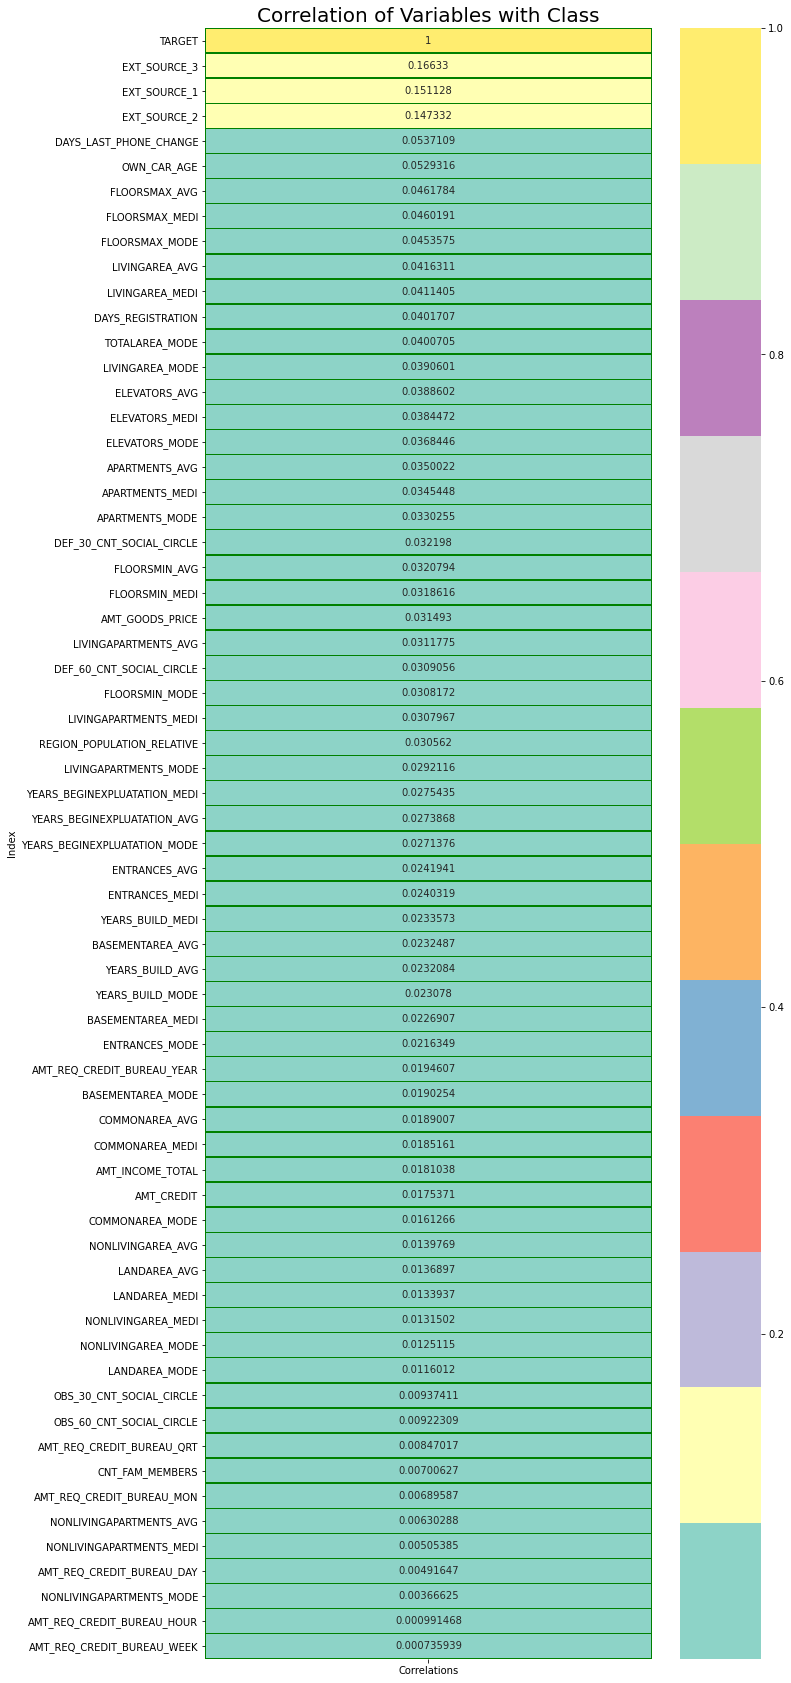

In [8]:
corr = df_flo.corrwith(df_flo['TARGET'],method='spearman').reset_index()

corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr['Correlations']=abs(corr['Correlations'])
corr = corr.sort_values(by=['Correlations'], ascending = False).head(65)

plt.figure(figsize=(10, 30))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='Set3', linewidths=0.4, linecolor='green')

plt.title("Correlation of Variables with Class", fontsize=20)
plt.show()

In [9]:
df_flo.drop(columns=['TARGET'] )

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0000,406597.5000,24700.5000,351000.0000,0.0188,-3648.0000,NaN,1.0000,0.0830,0.2629,0.1394,0.0247,0.0369,0.9722,0.6192,0.0143,0.0000,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.0000,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,0.0149,2.0000,2.0000,2.0000,2.0000,-1134.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,270000.0000,1293502.5000,35698.5000,1129500.0000,0.0035,-1186.0000,NaN,2.0000,0.3113,0.6222,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.0800,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.0800,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,0.0714,1.0000,0.0000,1.0000,0.0000,-828.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,67500.0000,135000.0000,6750.0000,135000.0000,0.0100,-4260.0000,26.0000,1.0000,NaN,0.5559,0.7296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,-815.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,135000.0000,312682.5000,29686.5000,297000.0000,0.0080,-9833.0000,NaN,2.0000,NaN,0.6504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0000,0.0000,2.0000,0.0000,-617.0000,NaN,NaN,NaN,NaN,NaN,NaN
4,121500.0000,513000.0000,21865.5000,513000.0000,0.0287,-4311.0000,NaN,1.0000,NaN,0.3227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,-1106.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0000,254700.0000,27558.0000,225000.0000,0.0326,-8456.0000,NaN,1.0000,0.1456,0.6816,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.2200,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172,0.9782,0.7125,0.0172,0.0806,0.0345,0.4583,0.0417,0.0094,0.0882,0.0853,0.0000,0.0125,0.2040,0.0887,0.9876,0.8323,0.0203,0.2200,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,0.2898,0.0000,0.0000,0.0000,0.0000,-273.0000,NaN,NaN,NaN,NaN,NaN,NaN
307507,72000.0000,269550.0000,12001.5000,225000.0000,0.0252,-4388.0000,NaN,1.0000

In [10]:
corr = df_flo.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(130)

,Var1,Var2,Correlation
2920,ELEVATORS_MEDI,ELEVATORS_AVG,1.0000
2786,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,1.0000
2585,APARTMENTS_MEDI,APARTMENTS_AVG,1.0000
3121,FLOORSMIN_MEDI,FLOORSMIN_AVG,1.0000
2853,COMMONAREA_MEDI,COMMONAREA_AVG,1.0000
3054,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.0000
3322,LIVINGAREA_MEDI,LIVINGAREA_AVG,1.0000
3750,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.0000
2987,ENTRANCES_MEDI,ENTRANCES_AVG,1.0000
2719,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.9900


#### 1st round drop: columns have both >50% NA and >70% correlation  with other columns

In [28]:
unwanted1=['APARTMENTS_AVG','AMT_GOODS_PRICE','ELEVATORS_AVG','FLOORSMIN_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI']
len(unwanted1)

34

In [12]:
df_flo_drop1=df_flo.copy()
df_flo_drop1=df_flo_drop1.drop(columns=unwanted1)

#### remain NA and correlation check

In [13]:
missing(df_flo_drop1)

,Total,Percentage
COMMONAREA_AVG,214865,69.872297
NONLIVINGAPARTMENTS_AVG,213514,69.432963
YEARS_BUILD_AVG,204488,66.497784
OWN_CAR_AGE,202929,65.990810
LANDAREA_AVG,182590,59.376738
BASEMENTAREA_AVG,179943,58.515956
EXT_SOURCE_1,173378,56.381073
NONLIVINGAREA_AVG,169682,55.179164
ENTRANCES_AVG,154828,50.348768
FLOORSMAX_AVG,153020,49.760822


In [14]:
corr =df_flo_drop1.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(30)

,Var1,Var2,Correlation
724,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.0000
757,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.8600
65,AMT_ANNUITY,AMT_CREDIT,0.7700
618,TOTALAREA_MODE,BASEMENTAREA_AVG,0.6700
458,ENTRANCES_AVG,BASEMENTAREA_AVG,0.6500
623,TOTALAREA_MODE,FLOORSMAX_AVG,0.6300
622,TOTALAREA_MODE,ENTRANCES_AVG,0.6000
621,TOTALAREA_MODE,COMMONAREA_AVG,0.5500
492,FLOORSMAX_AVG,YEARS_BUILD_AVG,0.5200
526,LANDAREA_AVG,ENTRANCES_AVG,0.5100


#### 2nd round drop: columns have both >50% NA and <1% correlation with TARGET

In [9]:
unwanted2=['NONLIVINGAPARTMENTS_AVG']
len(unwanted2)

1

In [16]:
df_flo_drop2=df_flo_drop1.copy()
df_flo_drop2=df_flo_drop2.drop(columns=unwanted2)

#### 3rd round housing series selection

In [17]:
df_flo_hou=df_flo_drop2[['COMMONAREA_AVG','YEARS_BUILD_AVG','LANDAREA_AVG','BASEMENTAREA_AVG','NONLIVINGAREA_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_AVG','TOTALAREA_MODE']]
df_flo_hou.agg(['count','min', 'max','mad','mean','median','quantile','kurt','skew','var','std'])

,COMMONAREA_AVG,YEARS_BUILD_AVG,LANDAREA_AVG,BASEMENTAREA_AVG,NONLIVINGAREA_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_AVG,TOTALAREA_MODE
count,92646.0000,103023.0000,124921.0000,127568.0000,137829.0000,152683.0000,154491.0000,157504.0000,159080.0000
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
mad,0.0420,0.0839,0.0495,0.0524,0.0361,0.0700,0.1161,0.0109,0.0729
mean,0.0446,0.7525,0.0663,0.0884,0.0284,0.1497,0.2263,0.9777,0.1025
median,0.0211,0.7552,0.0481,0.0763,0.0036,0.1379,0.1667,0.9816,0.0688
quantile,0.0211,0.7552,0.0481,0.0763,0.0036,0.1379,0.1667,0.9816,0.0688
kurt,45.9880,4.3998,34.7448,25.9301,64.9124,11.5932,2.4325,248.1763,12.1675
skew,5.4573,-0.9625,4.4587,3.5663,6.5590,2.3997,1.2265,-15.5153,2.7976
var,0.0058,0.0128,0.0066,0.0068,0.0048,0.0100,0.0209,0.0035,0.0115


In [18]:
corr =df_flo_hou.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(20)

,Var1,Var2,Correlation
75,TOTALAREA_MODE,BASEMENTAREA_AVG,0.6700
48,ENTRANCES_AVG,BASEMENTAREA_AVG,0.6500
78,TOTALAREA_MODE,FLOORSMAX_AVG,0.6300
77,TOTALAREA_MODE,ENTRANCES_AVG,0.6000
72,TOTALAREA_MODE,COMMONAREA_AVG,0.5500
55,FLOORSMAX_AVG,YEARS_BUILD_AVG,0.5200
47,ENTRANCES_AVG,LANDAREA_AVG,0.5100
74,TOTALAREA_MODE,LANDAREA_AVG,0.4900
64,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,0.4800
29,BASEMENTAREA_AVG,LANDAREA_AVG,0.4700


In [19]:
missing(df_flo_hou)

,Total,Percentage
COMMONAREA_AVG,214865,69.872297
YEARS_BUILD_AVG,204488,66.497784
LANDAREA_AVG,182590,59.376738
BASEMENTAREA_AVG,179943,58.515956
NONLIVINGAREA_AVG,169682,55.179164
ENTRANCES_AVG,154828,50.348768
FLOORSMAX_AVG,153020,49.760822
YEARS_BEGINEXPLUATATION_AVG,150007,48.781019
TOTALAREA_MODE,148431,48.268517


In [20]:
df_flo_hou1=df_flo_hou.dropna(subset=['TOTALAREA_MODE'])
missing(df_flo_hou1)

,Total,Percentage
COMMONAREA_AVG,66451,41.772064
YEARS_BUILD_AVG,56148,35.295449
LANDAREA_AVG,34220,21.511189
BASEMENTAREA_AVG,31563,19.840961
NONLIVINGAREA_AVG,21299,13.388861
ENTRANCES_AVG,6598,4.147599
FLOORSMAX_AVG,4804,3.019864
YEARS_BEGINEXPLUATATION_AVG,1761,1.106990


This means over 40% of the data of 'COMMONAREA_AVG' can be imputed by 'TOTALAREA_MODE', if they are related to each other

In [21]:
import numpy as np
from sklearn.impute import KNNImputer
df_flo_impute=df_flo_hou[['TOTALAREA_MODE','COMMONAREA_AVG' ]]
nan = np.nan
imputer = KNNImputer(n_neighbors=10, weights="uniform")
#df_flo_impute=imputer.fit_transform(df_flo_impute)

array([[0.0149    , 0.0143    ],
       [0.0714    , 0.0605    ],
       [0.10254666, 0.04462072],
       ...,
       [0.797     , 0.0123    ],
       [0.0086    , 0.02091   ],
       [0.0718    , 0.0176    ]])

#### since knn for over 300k raws of data takes a lot of time, we skip the step in this notebook and attach finished data

In [28]:
#df_flo_impute=pd.DataFrame(df_flo_impute)
#df_flo_impute.to_csv('float_housing_part_data_after_impute.csv')
pd.read_csv('float_housing_part_data_after_impute.csv')

#### to check by correlation with target

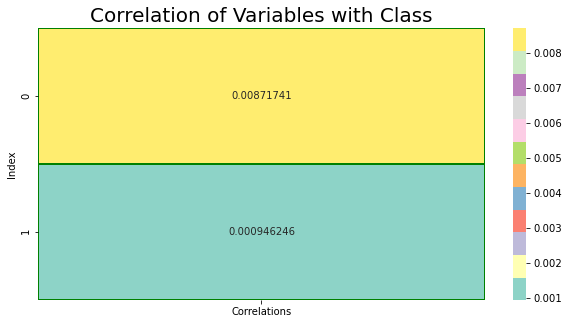

In [29]:
corr = df_flo_impute.corrwith(df['TARGET'],method='spearman').reset_index()

corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr['Correlations']=abs(corr['Correlations'])
corr = corr.sort_values(by=['Correlations'], ascending = False).head(2)

plt.figure(figsize=(10, 5))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='Set3', linewidths=0.4, linecolor='green')

plt.title("Correlation of Variables with Class", fontsize=20)
plt.show()

In [18]:
unwanted3=['TOTALAREA_MODE','COMMONAREA_AVG','YEARS_BUILD_AVG','LANDAREA_AVG','BASEMENTAREA_AVG','NONLIVINGAREA_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_AVG']

#### Round 4: OWN_CAR_AGE

In [52]:
df['OWN_CAR_AGE'] = df['OWN_CAR_AGE'].fillna(float(0))
df['OWN_CAR_AGE']

0         0.0000
1         0.0000
2        26.0000
3         0.0000
4         0.0000
           ...  
307506    0.0000
307507    0.0000
307508    0.0000
307509    0.0000
307510    0.0000
Name: OWN_CAR_AGE, Length: 307511, dtype: float64

In [60]:
bins = [-1,0,10,100]
slot = ['<0','1-10', '>10']

df['OWN_CAR_AGE_RANGE']=pd.cut(df['OWN_CAR_AGE'],bins,labels=slot)

<AxesSubplot:xlabel='OWN_CAR_AGE_RANGE', ylabel='count'>

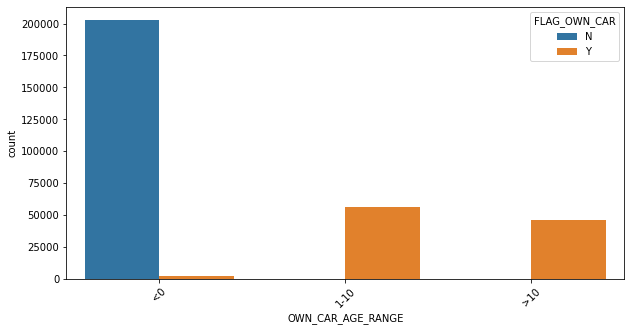

In [61]:
plt.subplots(figsize=(10, 5))
plt.xticks(rotation = '45')
sns.countplot(x='OWN_CAR_AGE_RANGE', hue= 'FLAG_OWN_CAR', data = df)

OWN_CAR_AGE does not show much conflict to FLAG_OWN_CAR and it has high correlation with target, but the NA rate is as high as 66 percent.

In [11]:
unwanted4=['OWN_CAR_AGE']

#### Round 5 :Social circle series 
* OBS_30_CNT_SOCIAL_CIRCLE
* DEF_30_CNT_SOCIAL_CIRCLE
* OBS_60_CNT_SOCIAL_CIRCLE
* DEF_60_CNT_SOCIAL_CIRCLE

## Choose 30/60 days' set due to the high corre to each other.
Personally,I believe '30 days' is a better period, since loans are normally paid monthly, so one month period is theoritically more sensitive for default detection. This may partly answer the question 'when should our detection applied in a real loan period?'

In [12]:
unwanted5=['OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

#### Round 6: AMT_REQ_CREDIT_BUREAU Series
* AMT_REQ_CREDIT_BUREAU_QRT
* AMT_REQ_CREDIT_BUREAU_HOUR
* AMT_REQ_CREDIT_BUREAU_MON
* AMT_REQ_CREDIT_BUREAU_WEEK
* AMT_REQ_CREDIT_BUREAU_YEAR
* AMT_REQ_CREDIT_BUREAU_DAY	

These will be processed later to 'merge them together to make the dataset more efficient'. Moreover, from the corre with the target, we can see year is the most related one, then comes qrt, mon, day, hour and week, so a merging regarding on time can add the weight to longer time period automaticly. 

#### Round 7: EXT_SOURCE series
* EXT_SOURCE_1: NA 56%, corre with target 0.15, drop it
* EXT_SOURCE_2: NA 0.2%, corre with target 0.14, keep it.
* EXT_SOURCE_3: NA 20%, corre with target 0.16, keep it
#### These are external source score that have high negative correlation with target, which means the people with higher score tend to less likely to default. I want to keep 2 and 3 and impute the na value, but hesitate about whether to use 0 or mode.

In [13]:
unwanted7=['EXT_SOURCE_1']

#### Round 8: the rest
* AMT_ANNUITY: very few NA and high corre with target, keep it. impute with mode
* CNT_FAM_MEMBERS: very low corre with target, want to drop it if it has high corre with other type of data
* DAYS_LAST_PHONE_CHANGE:  very few NA and high corre with target, keep it. impute with mode

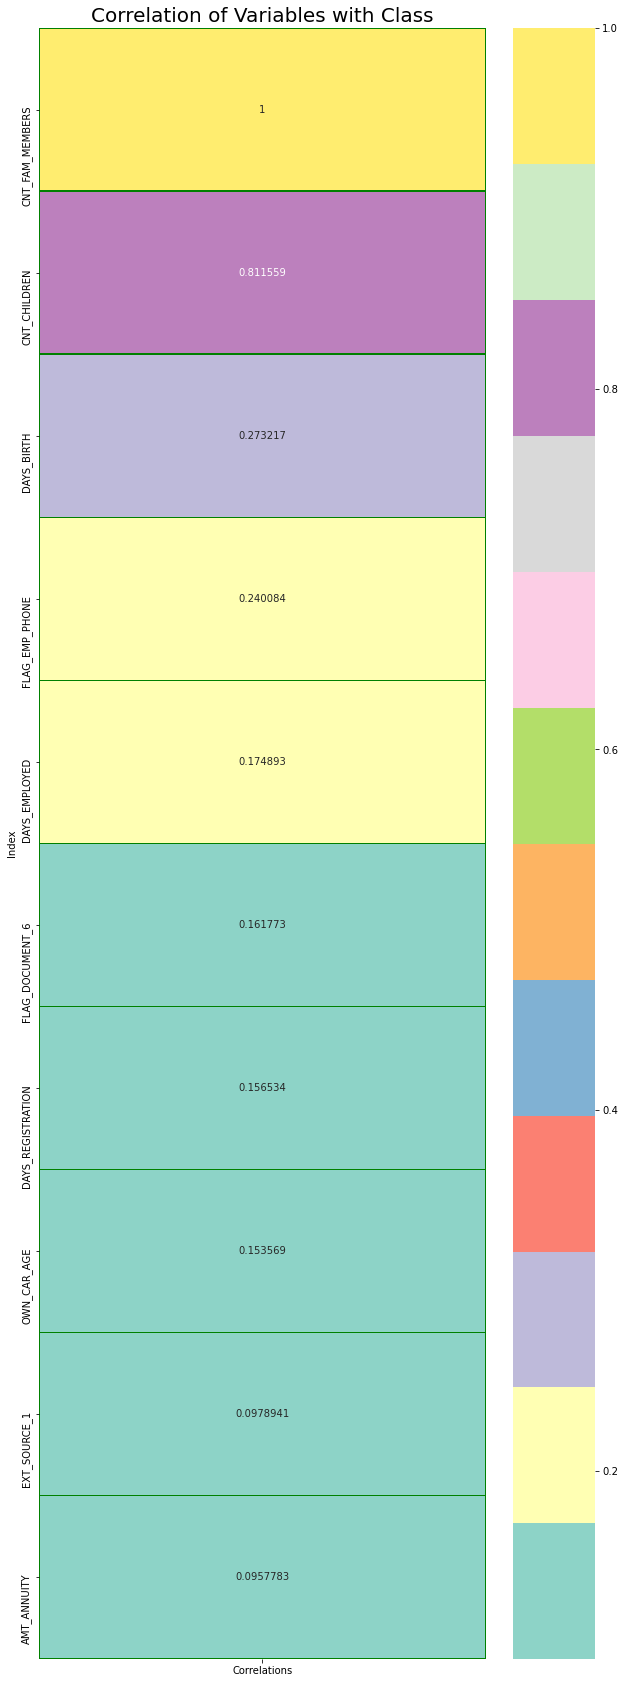

In [62]:
corr = df.corrwith(df_flo['CNT_FAM_MEMBERS'],method='spearman').reset_index()

corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr['Correlations']=abs(corr['Correlations'])
corr = corr.sort_values(by=['Correlations'], ascending = False).head(10)

plt.figure(figsize=(10, 10))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='Set3', linewidths=0.4, linecolor='green')

plt.title("Correlation of Variables with Class", fontsize=20)
plt.show()

We may either drop 'CNT_FAM_MEMBERS' or 'CNT_CHILDREN' at this round.

In [30]:
unwanted8=['CNT_FAM_MEMBERS']

In [22]:
df_flo_realty_impute = pd.read_csv('float_housing_part_data_after_impute.csv')

In [34]:
df_flo_droped=df_flo.copy()

In [35]:
df_flo_droped.drop(labels=unwanted1,axis=1,inplace=True)
df_flo_droped.drop(labels=unwanted2,axis=1,inplace=True)
df_flo_droped.drop(labels=unwanted3,axis=1,inplace=True)
df_flo_droped.drop(labels=unwanted4,axis=1,inplace=True)
df_flo_droped.drop(labels=unwanted5,axis=1,inplace=True)
df_flo_droped.drop(labels=unwanted7,axis=1,inplace=True)
df_flo_droped.drop(labels=unwanted8,axis=1,inplace=True)
df_flo_droped['TOTALAREA_MODE']=df_flo_realty_impute['TOTALAREA_MODE']
df_flo_droped['COMMONAREA_AVG']=df_flo_realty_impute['COMMONAREA_AVG']

In [7]:
def avg_impute(df,col):
    return df[col].fillna(df[col].mean()[0])
df_flo_droped['AMT_INCOME_TOTAL'] = avg_impute(df_flo_droped,'AMT_INCOME_TOTAL')
df_flo_droped['AMT_CREDIT'] = avg_impute(df_flo_droped,'AMT_CREDIT')
df_flo_droped['AMT_ANNUITY'] = avg_impute(df_flo_droped,'AMT_ANNUITY')
df_flo_droped['EXT_SOURCE_2'] = avg_impute(df_flo_droped,'EXT_SOURCE_2')
df_flo_droped['EXT_SOURCE_3'] = avg_impute(df_flo_droped,'EXT_SOURCE_3')
df_flo_droped['OBS_30_CNT_SOCIAL_CIRCLE'] = avg_impute(df_flo_droped,'OBS_30_CNT_SOCIAL_CIRCLE')
df_flo_droped['DEF_30_CNT_SOCIAL_CIRCLE'] = avg_impute(df_flo_droped,'DEF_30_CNT_SOCIAL_CIRCLE')
df_flo_droped['DAYS_LAST_PHONE_CHANGE'] = avg_impute(df_flo_droped,'DAYS_LAST_PHONE_CHANGE')

In [8]:
df_flo_droped = df_flo_droped.interpolate(method ='zero', limit_direction ='forward')

In [15]:
missing(df_flo_droped)

,Total,Percentage


In [16]:
df_flo_droped.to_csv('float_after_selection.csv')